In [251]:
import pandas as pd

# Creating the dataset
data = {
    "Contingency_Table": ["E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10"],
    "f11": [8123, 8330, 9481, 3954, 2886, 1500, 4000, 4000, 1720, 61],
    "f10": [83, 2, 94, 3080, 1363, 2000, 2000, 2000, 7121, 2483],
    "f01": [424, 622, 127, 5, 1320, 500, 1000, 2000, 5, 4],
    "f00": [1370, 1046, 298, 2961, 4431, 6000, 3000, 2000, 1154, 7452]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)



  Contingency_Table   f11   f10   f01   f00
0                E1  8123    83   424  1370
1                E2  8330     2   622  1046
2                E3  9481    94   127   298
3                E4  3954  3080     5  2961
4                E5  2886  1363  1320  4431
5                E6  1500  2000   500  6000
6                E7  4000  2000  1000  3000
7                E8  4000  2000  2000  2000
8                E9  1720  7121     5  1154
9               E10    61  2483     4  7452


In [252]:
# def j_measure(f11, f10, f01, f00):
#     # Step 1: Compute total count N
#     N = f11 + f10 + f01 + f00
    
#     # Step 2: Compute probabilities
#     P_A = (f11 + f10) / N  # P(A)
#     P_B = (f11 + f01) / N  # P(B)
#     # P_not_B = 1 - P_B      # P(B̄)
#     P_not_B = (f10 + f00) / N
 
    
#     # return P_B_given_A, P_notB_given_A
#     # 
    
#     # Step 3: Compute conditional probabilities
#     # if (f11 + f10) > 0:
#     #     P_B_given_A = f11 / (f11 + f10)
#     #     P_not_B_given_A = f10 / (f11 + f10)
#     # else:
#     #     return 0  # Avoid division by zero

#     # 
#     f1_plus = f11 + f10
#     if f1_plus == 0:
#         return None, None  # Avoid division by zero
    
#     P_B_given_A = f11 / f1_plus
#     P_not_B_given_A = f10 / f1_plus
#     # 
    

#     # Step 4: Compute J-Measure terms safely
#     def safe_log2(x):
#         return np.log2(x) if x > 0 else 0  # Avoid log(0)
    
#     # term1 = P_B_given_A * safe_log2(P_B_given_A / P_B) if P_B_given_A > 0 else 0
#     # term2 = P_not_B_given_A * safe_log2(P_not_B_given_A / P_not_B) if P_not_B_given_A > 0 else 0
#     term1 = P_B_given_A * safe_log2(P_B_given_A / P_B) if P_B_given_A > 0 else 0
#     term2 = P_not_B_given_A * safe_log2(P_not_B_given_A / P_not_B) if P_not_B_given_A > 0 else 0
    
#     # Step 5: Compute J(A, B)
#     # J = P_A * (term1 + term2)
#     J = max((term1 + term2)
    
#     return J
# # f11, f10, f01, f00=1, 2, 3, 4
# # j_measure(f11, f10, f01, f00)
import math

def j_measure(f11, f10, f01, f00):
    N = f11 + f10 + f01 + f00
    if N == 0:
        return None

    # Marginals
    f1_plus = f11 + f10   # A
    f0_plus = f01 + f00   # ¬A
    f_plus1 = f11 + f01   # B
    f_plus0 = f10 + f00   # ¬B

    # Probabilities
    P_AB = f11 / N
    P_A_notB = f10 / N
    P_notA_B = f01 / N
    P_B = f_plus1 / N
    P_notB = f_plus0 / N
    P_A = f1_plus / N
    P_notA = f0_plus / N

    # Conditional probabilities
    P_B_given_A = f11 / f1_plus if f1_plus != 0 else 0
    P_notB_given_A = f10 / f1_plus if f1_plus != 0 else 0
    P_A_given_B = f11 / f_plus1 if f_plus1 != 0 else 0
    P_notA_given_B = f01 / f_plus1 if f_plus1 != 0 else 0

    # First expression: J(A ⇒ B)
    term1_A_to_B = P_AB * math.log2(P_B_given_A / P_B) if P_B_given_A > 0 and P_B > 0 else 0
    term2_A_to_B = P_A_notB * math.log2(P_notB_given_A / P_notB) if P_notB_given_A > 0 and P_notB > 0 else 0
    j_A_to_B = term1_A_to_B + term2_A_to_B

    # Second expression: J(B ⇒ A)
    term1_B_to_A = P_AB * math.log2(P_A_given_B / P_A) if P_A_given_B > 0 and P_A > 0 else 0
    term2_B_to_A = P_notA_B * math.log2(P_notA_given_B / P_notA) if P_notA_given_B > 0 and P_notA > 0 else 0
    j_B_to_A = term1_B_to_A + term2_B_to_A

    return max(j_A_to_B, j_B_to_A)
# f11, f10, f01, f00=1, 2, 3, 4
# j_measure(f11, f10, f01, f00)

In [253]:
import numpy as np

def goodman_kruskal_lambda(f11, f10, f01, f00):
   

    # Compute row and column totals
    f1_ = f11 + f10  # Total for A
    f0_ = f01 + f00  # Total for A̅
    f_1 = f11 + f01  # Total for B
    f_0 = f10 + f00  # Total for B̅
    N = f1_ + f0_    # Grand total

    # Compute joint probabilities
    P_A_B = f11 / N
    P_A_Bbar = f10 / N
    P_Abar_B = f01 / N
    P_Abar_Bbar = f00 / N

    # Compute marginal probabilities
    P_A = f1_ / N
    P_Abar = f0_ / N
    P_B = f_1 / N
    P_Bbar = f_0 / N

    # Compute max row-wise joint probabilities
    max_row_sums = max(P_A_B, P_A_Bbar) + max(P_Abar_B, P_Abar_Bbar)

    # Compute max column-wise joint probabilities
    max_col_sums = max(P_A_B, P_Abar_B) + max(P_A_Bbar, P_Abar_Bbar)

    # Compute max marginal probabilities
    max_P_A = max(P_A, P_Abar)
    max_P_B = max(P_B, P_Bbar)

    # Compute numerator and denominator
    numerator = max_row_sums + max_col_sums - max_P_A - max_P_B
    denominator = 2 - max_P_A - max_P_B

    # Avoid division by zero
    if denominator == 0:
        return 0.0

    # Compute Goodman-Kruskal's Lambda (λ)
    lambda_value = numerator / denominator

    # return lambda_value
    return 0.0 if (lambda_value == 0.0 or lambda_value == -0.0) else lambda_value



In [254]:
import numpy as np

def compute_gini_index(f11, f10, f01, f00):
    # Step 1: Compute Total Count
    N = f11 + f10 + f01 + f00
    
    # Step 2: Compute Marginal Probabilities
    P_A  = (f11 + f10) / N
    P_A_bar = (f01 + f00) / N
    P_B  = (f11 + f01) / N
    P_B_bar = (f10 + f00) / N

    # Step 3: Compute Conditional Probabilities
    P_B_given_A = f11 / (f11 + f10) if (f11 + f10) > 0 else 0
    P_B_bar_given_A = f10 / (f11 + f10) if (f11 + f10) > 0 else 0
    P_B_given_A_bar = f01 / (f01 + f00) if (f01 + f00) > 0 else 0
    P_B_bar_given_A_bar = f00 / (f01 + f00) if (f01 + f00) > 0 else 0

    P_A_given_B = f11 / (f11 + f01) if (f11 + f01) > 0 else 0
    P_A_bar_given_B = f01 / (f11 + f01) if (f11 + f01) > 0 else 0
    P_A_given_B_bar = f10 / (f10 + f00) if (f10 + f00) > 0 else 0
    P_A_bar_given_B_bar = f00 / (f10 + f00) if (f10 + f00) > 0 else 0

    # Step 4: Compute Gini Index Components
    g1 = (P_A * (P_B_given_A**2 + P_B_bar_given_A**2) + 
          P_A_bar * (P_B_given_A_bar**2 + P_B_bar_given_A_bar**2) - 
          P_B**2 - P_B_bar**2)

    g2 = (P_B * (P_A_given_B**2 + P_A_bar_given_B**2) + 
          P_B_bar * (P_A_given_B_bar**2 + P_A_bar_given_B_bar**2) - 
          P_A**2 - P_A_bar**2)

    # Step 5: Final Gini Index
    G = max(g1, g2)
    
    return G


In [255]:
# import numpy as np

# def mutual_information_2x2(f11, f10, f01, f00):
#     N = f11 + f10 + f01 + f00
#     # Joint probabilities
#     P11 = f11 / N
#     P10 = f10 / N
#     P01 = f01 / N
#     P00 = f00 / N
#     # Marginal probabilities
#     P_A1 = (f11 + f10) / N  # P(A=1)
#     P_A0 = (f01 + f00) / N  # P(A=0)
#     P_B1 = (f11 + f01) / N  # P(B=1)
#     P_B0 = (f10 + f00) / N  # P(B=0)
    
#     # Calculate each term
#     def term(p_joint, p_A, p_B):
#         if p_joint == 0:
#             return 0
#         return p_joint * np.log2(p_joint / (p_A * p_B))
    
#     M = term(P11, P_A1, P_B1) + term(P10, P_A1, P_B0) + \
#         term(P01, P_A0, P_B1) + term(P00, P_A0, P_B0)
    
#     return M

In [256]:
import math

def mutual_information(f11, f10, f01, f00):
    N = f11 + f10 + f01 + f00
    if N == 0:
        return None

    # Joint probabilities
    P = {
        ('A', 'B'): f11 / N,
        ('A', '¬B'): f10 / N,
        ('¬A', 'B'): f01 / N,
        ('¬A', '¬B'): f00 / N
    }

    # Marginal probabilities
    P_A = {
        'A': (f11 + f10) / N,
        '¬A': (f01 + f00) / N
    }

    P_B = {
        'B': (f11 + f01) / N,
        '¬B': (f10 + f00) / N
    }

    # Mutual Information numerator
    numerator = 0.0
    for a in ['A', '¬A']:
        for b in ['B', '¬B']:
            p_ab = P[(a, b)]
            if p_ab > 0 and P_A[a] > 0 and P_B[b] > 0:
                numerator += p_ab * math.log2(p_ab / (P_A[a] * P_B[b]))

    # Entropy of A
    entropy_A = -sum(p * math.log2(p) for p in P_A.values() if p > 0)

    # Entropy of B
    entropy_B = -sum(p * math.log2(p) for p in P_B.values() if p > 0)

    denominator = min(entropy_A, entropy_B)

    return numerator / denominator if denominator > 0 else 0.0
# print(mutual_information(20, 30, 10, 40))  # Substitute your contingency values


In [257]:
import numpy as np

def cohens_kappa(f11, f10, f01, f00):
    N = f11 + f10 + f01 + f00
    
    # Observed agreement (P_agree)
    P_agree = (f11 + f00) / N
    
    # Marginal probabilities
    P_A = (f11 + f10) / N  # P(A)
    P_notA = (f01 + f00) / N  # P(¬A)
    P_B = (f11 + f01) / N  # P(B)
    P_notB = (f10 + f00) / N  # P(¬B)
    
    # Chance agreement (P_chance)
    P_chance = (P_A * P_B) + (P_notA * P_notB)
    
    # Cohen's Kappa
    if P_chance == 1:
        return 1  # Perfect agreement edge case
    kappa = (P_agree - P_chance) / (1 - P_chance)
    
    return kappa

In [258]:
def confidence(f11, f10, f01, f00):
    
    N = f11 + f10 + f01 + f00
    
    # Joint probabilities
    P_A_and_B = f11 / N  # P(A ∩ B)
    P_A = (f11 + f10) / N  # P(A)
    P_B = (f11 + f01) / N  # P(B)
    
    # Avoid division by zero
    if P_A == 0 or P_B == 0:
        return 0.0
    
    # Conditional probabilities
    P_B_given_A = P_A_and_B / P_A  # P(B|A)
    P_A_given_B = P_A_and_B / P_B  # P(A|B)
    
    # Confidence is the maximum of the two
    c = max(P_B_given_A, P_A_given_B)
    return c

In [259]:
def laplace(f11, f10, f01, f00):
    
    N = f11 + f10 + f01 + f00
    
    # Joint probability P(A ∩ B)
    P_A_and_B = f11 / N
    
    # Marginal probabilities P(A) and P(B)
    P_A = (f11 + f10) / N
    P_B = (f11 + f01) / N
    
    # Laplace-smoothed conditional probabilities
    L_A_to_B = (N * P_A_and_B + 1) / (N * P_A + 2)  # (A → B)
    L_B_to_A = (N * P_A_and_B + 1) / (N * P_B + 2)  # (B → A)
    
    # Return the maximum of the two
    return max(L_A_to_B, L_B_to_A)

In [260]:
def conviction(f11, f10, f01, f00):
   
    N = f11 + f10 + f01 + f00
    
    # Marginal probabilities
    P_A = (f11 + f10) / N          # P(A)
    P_notA = (f01 + f00) / N        # P(¬A)
    P_B = (f11 + f01) / N           # P(B)
    P_notB = (f10 + f00) / N        # P(¬B)
    
    # Joint probabilities for the denominators
    P_A_and_notB = f10 / N          # P(A ∧ ¬B)
    P_notA_and_B = f01 / N          # P(¬A ∧ B)
    
    # Avoid division by zero (if P(A ∧ ¬B) or P(¬A ∧ B) is 0)
    if P_A_and_notB == 0 or P_notA_and_B == 0:
        return float('inf')  # Represents infinite conviction (perfect implication)
    
    # Calculate conviction for both directions
    V_A_to_B = (P_A * P_notB) / P_A_and_notB    # Conviction for A → B
    V_B_to_A = (P_B * P_notA) / P_notA_and_B    # Conviction for B → A
    
    # Return the maximum conviction
    return max(V_A_to_B, V_B_to_A)

In [261]:
def certainty_factor(f11, f10, f01, f00):
   
    N = f11 + f10 + f01 + f00
    
    # Marginal probabilities
    P_A = (f11 + f10) / N          # P(A)
    P_B = (f11 + f01) / N          # P(B)
    
    # Conditional probabilities
    P_B_given_A = f11 / (f11 + f10) if (f11 + f10) != 0 else 0  # P(B|A)
    P_A_given_B = f11 / (f11 + f01) if (f11 + f01) != 0 else 0  # P(A|B)
    
    # Calculate Certainty Factor components
    def CF(P_cond, P_event):
        if P_event == 1:  # Avoid division by zero
            return 0.0
        return (P_cond - P_event) / (1 - P_event)
    
    CF_A_to_B = CF(P_B_given_A, P_B)  # Certainty Factor for A → B
    CF_B_to_A = CF(P_A_given_B, P_A)  # Certainty Factor for B → A
    
    # Return the maximum Certainty Factor
    return max(CF_A_to_B, CF_B_to_A)

In [262]:
def added_value(f11, f10, f01, f00):
   
    N = f11 + f10 + f01 + f00
    
    # Marginal probabilities
    P_A = (f11 + f10) / N          # P(A)
    P_B = (f11 + f01) / N          # P(B)
    
    # Conditional probabilities
    P_B_given_A = f11 / (f11 + f10) if (f11 + f10) != 0 else 0  # P(B|A)
    P_A_given_B = f11 / (f11 + f01) if (f11 + f01) != 0 else 0  # P(A|B)
    
    # Calculate Added Value components
    AV_A_to_B = P_B_given_A - P_B  # Added Value for A → B
    AV_B_to_A = P_A_given_B - P_A  # Added Value for B → A
    
    # Return the maximum Added Value
    return max(AV_A_to_B, AV_B_to_A)

In [263]:
def collective_strength(f11, f10, f01, f00):
   
    N = f11 + f10 + f01 + f00
    
    # Joint probabilities
    P_AB = f11 / N          # P(A ∩ B)
    P_notA_notB = f00 / N   # P(¬A ∩ ¬B)
    
    # Marginal probabilities
    P_A = (f11 + f10) / N   # P(A)
    P_notA = (f01 + f00) / N  # P(¬A)
    P_B = (f11 + f01) / N   # P(B)
    P_notB = (f10 + f00) / N  # P(¬B)
    
    # Numerator and denominator terms
    numerator = P_AB + P_notA_notB
    denominator = P_A * P_B + P_notA * P_notB
    
    # Handle division by zero (if denominator is 0)
    if denominator == 0:
        return float('inf')  # Infinite strength if no independence assumption
    
    # First term: (P_AB + P_notA_notB) / (P_A * P_B + P_notA * P_notB)
    term1 = numerator / denominator
    
    # Second term: (1 - P_A * P_B - P_notA * P_notB) / (1 - P_AB - P_notA_notB)
    term2_numerator = 1 - P_A * P_B - P_notA * P_notB
    term2_denominator = 1 - P_AB - P_notA_notB
    
    # Handle division by zero (if term2_denominator is 0)
    if term2_denominator == 0:
        return float('inf')  # Infinite strength if all cases are either (A and B) or (¬A and ¬B)
    
    term2 = term2_numerator / term2_denominator
    
    # Collective Strength
    S = term1 * term2
    
    return S

In [264]:
import math

def klosgen(f11, f10, f01, f00):
   
    N = f11 + f10 + f01 + f00
    if N == 0:
        return 0.0  # Handle empty table case
    
    # Calculate probabilities
    P_AB = f11 / N  # P(A ∩ B)
    P_A = (f11 + f10) / N  # P(A)
    P_B = (f11 + f01) / N  # P(B)
    
    # Calculate conditional probabilities with zero-division protection
    P_B_given_A = f11 / (f11 + f10) if (f11 + f10) != 0 else 0
    P_A_given_B = f11 / (f11 + f01) if (f11 + f01) != 0 else 0
    
    # Calculate the max term
    term1 = P_B_given_A - P_B
    term2 = P_A_given_B - P_A
    max_term = max(term1, term2)
    
    # Calculate Klosgen's measure
    K = math.sqrt(P_AB) * max_term
    
    return K

In [265]:
import numpy as np
import pandas as pd

# Function to calculate interestingness measures
def transformed_calculate_measures(f11, f10, f01, f00):
    N = f11 + f10 + f01 + f00
    P_A = (f11 + f10) / N
    P_notA = (f01 + f00) / N
    P_B = (f11 + f01) / N
    P_notB = (f10 + f00) / N
    P_AB = f11 / N
    P_A_notB = f10 / N
    P_notA_B = f01 / N
    P_notA_notB = f00 / N
    
    # Probabilities
    P11 = f11 / N
    P10 = f10 / N
    P01 = f01 / N
    P00 = f00 / N

    # Marginal Probabilities
    P1x = (f11 + f10) / N
    Px1 = (f11 + f01) / N
    P0x = (f01 + f00) / N
    Px0 = (f10 + f00) / N

    # Phi coefficient
    phi = (f11 * f00 - f10 * f01) / np.sqrt((f11 + f10) * (f01 + f00) * (f11 + f01) * (f10 + f00))
    # phi = (P_AB - P_A * P_B) / math.sqrt(P_A * P_notA * P_B * P_notB)
    
    # Goodman-Kruskal's Lambda
    lambda_val = (max(f11 + f10, f01 + f00) - max(f10, f00)) / (N - max(f10, f00))
    # lambda_val = goodman_kruskal_lambda(f11, f10, f01, f00)
    
    # Odds Ratio
    odds_ratio = (f11 * f00) / (f10 * f01) if f10 * f01 != 0 else np.nan
    # odds_ratio = (P_AB*P_notA_notB) / (P_A_notB*P_notA_B) if (P_A_notB*P_notA_B) != 0 else np.nan
    
    # Yule’s Q
    yules_q = (odds_ratio - 1) / (odds_ratio + 1) if odds_ratio is not np.nan else np.nan

    # Yule’s Y
    yules_y = (np.sqrt(odds_ratio) - 1) / (np.sqrt(odds_ratio) + 1) if odds_ratio is not np.nan else np.nan

    # Kappa (κ)
    pe = P1x * Px1 + P0x * Px0
    kappa = (P11 + P00 - pe) / (1 - pe)
    # kappa = cohens_kappa(f11, f10, f01, f00)

    # Mutual Information
    MI = P11 * np.log2(P11 / (P1x * Px1)) + P10 * np.log2(P10 / (P1x * Px0)) + \
         P01 * np.log2(P01 / (P0x * Px1)) + P00 * np.log2(P00 / (P0x * Px0))
    

    # MI = mutual_information_2x2(f11, f10, f01, f00)
    
    # J-Measure
    J_measure = P11 * np.log2(P11 / Px1) + P10 * np.log2(P10 / Px0)
    # J_measure = j_measure(f11, f10, f01, f00)
    
    # Gini Index
    Gini = 1 - (P11**2 + P10**2 + P01**2 + P00**2)
    # Gini = compute_gini_index(f11, f10, f01, f00)

    # Support
    support = P11

    # Confidence
    c = P11 / P1x
    # c = confidence(f11, f10, f01, f00)

    # Laplace
    Laplace = (f11 + 1) / (f11 + f10 + 2)
    # Laplace = laplace(f11, f10, f01, f00)

    # Conviction
    V = (1 - Px1) / (1 - c) if (1 - c) != 0 else np.nan
    # V = conviction(f11, f10, f01, f00)

    # Interest (Lift)
    interest = c / Px1
    # interest = P_AB / P_A * P_B

    # Cosine
    cosine = P11 / np.sqrt(P1x * Px1)
    # cosine = P_AB / np.sqrt(P_A * P_B)

    # Piatetsky-Shapiro’s Measure
    PS = P11 - (P1x * Px1)
    # PS = P_AB - (P_A * P_B)

    # Certainty Factor
    F = (c - Px1) / (1 - Px1)
    # F = certainty_factor(f11, f10, f01, f00)

    # Added Value
    AV = c - Px1
    # AV = added_value(f11, f10, f01, f00)

    # Collective Strength
    strength = ((c / Px1) + ((1 - c) / (1 - Px1))) / 2
    # strength = collective_strength(f11, f10, f01, f00)

    # Jaccard Index
    jaccard = P11 / (P11 + P10 + P01)

    # Klosgen
    K = np.sqrt(P11) * (c - Px1)
    # K = klosgen(f11, f10, f01, f00)
    verbose = {
        "Phi (φ)": phi,
        "Goodman-Kruskal Lambda (λ)": lambda_val,
        "Odds Ratio (α)": odds_ratio,
        "Yule’s Q": yules_q,
        "Yule’s Y": yules_y,
        "Kappa (κ)": kappa,
        "Mutual Information (M)": MI,
        "J-Measure (J)": J_measure,
        "Gini Index (G)": Gini,
        "Support (s)": support,
        "Confidence (c)": c,
        "Laplace (L)": Laplace,
        "Conviction (V)": V,
        "Interest (I)": interest,
        "Cosine (IS)": cosine,
        "Piatetsky-Shapiro’s PS": PS,
        "Certainty Factor (F)": F,
        "Added Value (AV)": AV,
        "Collective Strength (S)": strength,
        "Jaccard": jaccard,
        "Klosgen (K)": K
    }
    shortcut = {
        "φ": phi,
        "λ": lambda_val,
        "α": odds_ratio,
        "Q": yules_q,
        "Y": yules_y,
        "κ": kappa,
        "M": MI,
        "J": J_measure,
        "G": Gini,
        "s": support,
        "c": c,
        "L": Laplace,
        "V": V,
        "I": interest,
        "IS": cosine,
        "PS": PS,
        "F": F,
        "AV": AV,
        "S": strength,
        "Jaccard": jaccard,
        "K": K
    }
    return shortcut



In [276]:
import numpy as np
import pandas as pd

# Function to calculate interestingness measures
def new_calculate_measures(f11, f10, f01, f00):
    N = f11 + f10 + f01 + f00
    P_A = (f11 + f10) / N
    P_notA = (f01 + f00) / N
    P_B = (f11 + f01) / N
    P_notB = (f10 + f00) / N
    P_AB = f11 / N
    P_A_notB = f10 / N
    P_notA_B = f01 / N
    P_notA_notB = f00 / N
    
    # Probabilities
    P11 = f11 / N
    P10 = f10 / N
    P01 = f01 / N
    P00 = f00 / N

    # Marginal Probabilities
    P1x = (f11 + f10) / N
    Px1 = (f11 + f01) / N
    P0x = (f01 + f00) / N
    Px0 = (f10 + f00) / N

    # Phi coefficient
    phi = (P_AB - P_A * P_B) / math.sqrt(P_A * P_notA * P_B * P_notB)
    
    # Goodman-Kruskal's Lambda
    lambda_val = goodman_kruskal_lambda(f11, f10, f01, f00)
    if lambda_val==-0.0:
        lambda_val=0.0
    
    # Odds Ratio
    odds_ratio = (P_AB * P_notA_notB) / (P_A_notB * P_notA_B) if (P_A_notB * P_notA_B) != 0 else np.nan
    
    # Yule’s Q
    yules_q = (odds_ratio - 1) / (odds_ratio + 1) if odds_ratio is not np.nan else np.nan

    # Yule’s Y
    yules_y = (np.sqrt(odds_ratio) - 1) / (np.sqrt(odds_ratio) + 1) if odds_ratio is not np.nan else np.nan

    # Kappa (κ)
    kappa = cohens_kappa(f11, f10, f01, f00)

    # Mutual Information
    # MI = mutual_information_2x2(f11, f10, f01, f00)
    MI = mutual_information(f11, f10, f01, f00)
    
    # J-Measure
    J_measure = j_measure(f11, f10, f01, f00)
    
    # Gini Index
    Gini = compute_gini_index(f11, f10, f01, f00)

    # Support
    support = P11

    # Confidence
    c = confidence(f11, f10, f01, f00)

    # Laplace
    Laplace = laplace(f11, f10, f01, f00)

    # Conviction
    V = conviction(f11, f10, f01, f00)

    # Interest (Lift)
    interest = P_AB / (P_A * P_B)

    # Cosine
    cosine = P_AB / np.sqrt(P_A * P_B)

    # Piatetsky-Shapiro’s Measure
    PS = P_AB - (P_A * P_B)

    # Certainty Factor
    F = certainty_factor(f11, f10, f01, f00)

    # Added Value
    AV = added_value(f11, f10, f01, f00)

    # Collective Strength
    strength = collective_strength(f11, f10, f01, f00)

    # Jaccard Index
    jaccard = P11 / (P11 + P10 + P01)

    # Klosgen
    K = klosgen(f11, f10, f01, f00)
    shortcut = {
        "φ": phi,
        "λ": lambda_val,
        "α": odds_ratio,
        "Q": yules_q,
        "Y": yules_y,
        "κ": kappa,
        "M": MI,
        "J": J_measure,
        "G": Gini,
        "s": support,
        "c": c,
        "L": Laplace,
        "V": V,
        "I": interest,
        "IS": cosine,
        "PS": PS,
        "F": F,
        "AV": AV,
        "S": strength,
        "Jaccard": jaccard,
        "K": K
    }
    return shortcut



In [277]:
index=0
new_measured_results={}
result_data_list = []
for table in data['Contingency_Table']:
    if index>9:
        break
    example_f11, example_f10, example_f01, example_f00 = data['f11'][index], data['f10'][index], data['f01'][index], data['f00'][index]
    results = new_calculate_measures(example_f11, example_f10, example_f01, example_f00)
    print(f'Results for the data: {table}: \n{results}\n\n')
    new_measured_results[table]=results
    result_data_list.append(results)
    index=index+1

Results for the data: E1: 
{'φ': 0.8204362252680502, 'λ': 0.6877117339082232, 'α': 316.2227210729711, 'Q': 0.993695281368134, 'Y': 0.8935187654387549, 'κ': 0.8139902517684134, 'M': 0.6513919878891562, 'J': 0.14017084060448792, 'G': 0.19818628761708593, 's': 0.8123, 'c': 0.9898854496709725, 'L': 0.9897660818713451, 'V': 14.365443373493976, 'I': 1.158167134282172, 'IS': 0.9699377109780856, 'PS': 0.11093317999999996, 'F': 0.9303885042737265, 'AV': 0.13518544967097246, 'S': 7.015754684394545, 'Jaccard': 0.9412514484356895, 'K': 0.12183951921920966}


Results for the data: E2: 
{'φ': 0.7629592530656634, 'λ': 0.5405007363770247, 'α': 7004.163987138264, 'Q': 0.9997144963338942, 'Y': 0.9763847073441445, 'κ': 0.7363068900981207, 'M': 0.6660680638266179, 'J': 0.1310026068669648, 'G': 0.16179980435967223, 's': 0.833, 'c': 0.9997599615938549, 'L': 0.9996400287976962, 'V': 436.59680000000003, 'I': 1.1168006720217325, 'IS': 0.964517993504581, 'PS': 0.08711935999999987, 'F': 0.9977095571932734, 'AV':

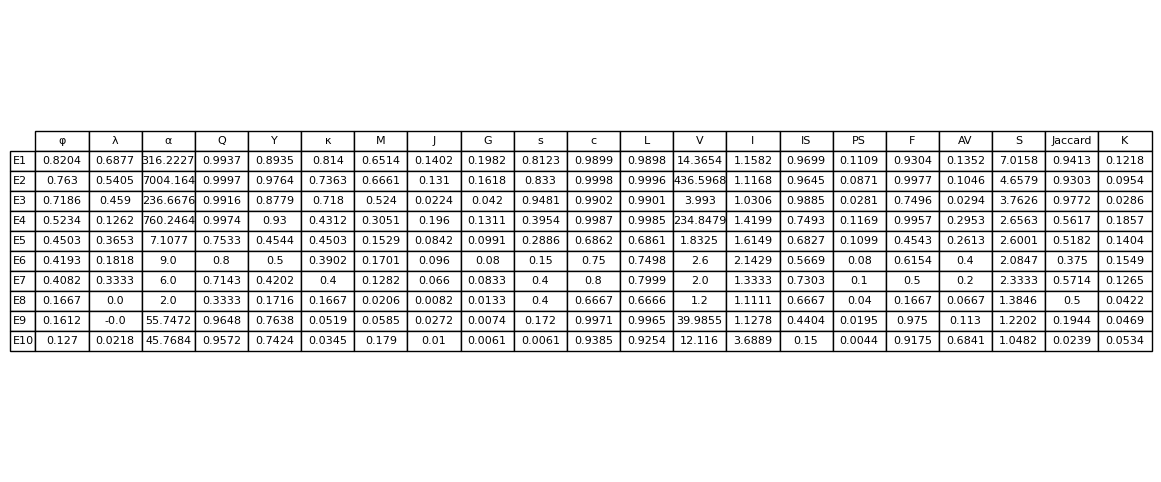

In [278]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(result_data_list)

# Add labels for each contingency table
df.index = [f"E{i+1}" for i in range(len(df))]

# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=df.round(4).values, 
                 colLabels=df.columns, 
                 rowLabels=df.index, 
                 cellLoc='center', 
                 loc='center')

# Adjust font size for better readability
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)  # Adjust scale for better fit

# Show the plot with the table
plt.show()

In [279]:
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(result_data_list)

# Apply rank with method='min' for "standard competition ranking"
rank_df = df.rank(ascending=False, method='min')

# Convert to integer ranks and back to list of dicts
ranked_dicts = rank_df.astype(int).to_dict(orient='records')

# Output
# for i, d in enumerate(ranked_dicts, 1):
#     print(f"Ranked Dict {i}:\n{d}\n")


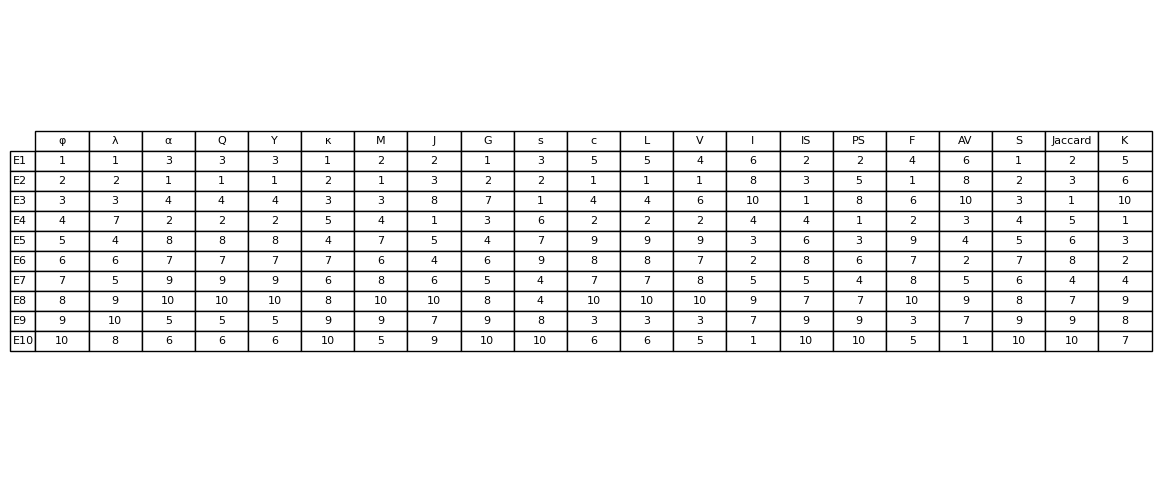

In [280]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(ranked_dicts)

# Add labels for each contingency table
df.index = [f"E{i+1}" for i in range(len(df))]

# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=df.round(4).values, 
                 colLabels=df.columns, 
                 rowLabels=df.index, 
                 cellLoc='center', 
                 loc='center')

# Adjust font size for better readability
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)  # Adjust scale for better fit

# Show the plot with the table
plt.show()

In [281]:
# working code for all ranking with values greater means rank 1
# Convert nested dict to DataFrame
df = pd.DataFrame.from_dict(new_measured_results, orient='index')

# Apply ranking (higher value = better rank, method='min' to tie ranks)
rank_df = df.rank(ascending=False, method='min')

# Convert back to nested dictionary with int ranks
ranked_nested_dict = rank_df.astype(int).to_dict(orient='index')

# # return ranked_nested_dict


# this is for the I smallest value means rank 1
# import pandas as pd

# # Convert nested dict to DataFrame
# df = pd.DataFrame.from_dict(new_measured_results, orient='index')

# # Create an empty DataFrame to store ranks
# rank_df = pd.DataFrame(index=df.index)

# # Apply column-wise ranking
# for col in df.columns:
#     if col == "I":  # Interest: smaller value is better
#         rank_df[col] = df[col].rank(ascending=True, method='min')
#     else:  # Other measures: higher value is better
#         rank_df[col] = df[col].rank(ascending=False, method='min')

# # Convert ranks to integers and back to nested dictionary
# ranked_nested_dict = rank_df.astype(int).to_dict(orient='index')


In [282]:
# from scipy.stats import rankdata


# # Get all metric keys
# metrics = new_measured_results["E1"].keys()
# print(f'\nMetrics:\n {metrics}\n')

# entities = new_measured_results.keys()
# print(f'\nentities:\n {entities}\n')

# # Convert values to rank
# ranked_results = {entity: {} for entity in new_measured_results}
# print(f'\nranked_results:\n {ranked_results}\n')

# for metric in metrics:
#     # Collect all values for a specific metric across all entities
#     values = [new_measured_results[entity][metric] for entity in entities]

#     # Compute ranks (highest value gets rank 1, same values get same rank)
#     ranks = rankdata(values, method="min")[::-1]  # "min" ensures ties get the same rank

#     # Store ranks back in the dictionary
#     for i, entity in enumerate(entities):
#         ranked_results[entity][metric] = int(ranks[i])  # Convert to integer rank

# print(ranked_results)

# # Print the ranked dictionary
# # import pprint
# # pprint.pprint(ranked_results)
# # test copied from the output
# data_output = {
#     'E1': {'φ': 1, 'λ': 3, 'α': 5, 'Q': 5, 'Y': 5, 'κ': 1, 'M': 1, 'J': 2, 'G': 1, 's': 1, 'c': 5, 'L': 5, 'V': 6, 'I': 1, 'IS': 1, 'PS': 1, 'F': 6, 'AV': 10, 'S': 1, 'Jaccard': 1, 'K': 4}, 
#     'E2': {'φ': 2, 'λ': 1, 'α': 6, 'Q': 6, 'Y': 6, 'κ': 2, 'M': 3, 'J': 1, 'G': 2, 's': 3, 'c': 8, 'L': 8, 'V': 8, 'I': 2, 'IS': 2, 'PS': 2, 'F': 8, 'AV': 4, 'S': 2, 'Jaccard': 2, 'K': 3}, 
#     'E3': {'φ': 3, 'λ': 2, 'α': 1, 'Q': 1, 'Y': 1, 'κ': 3, 'M': 2, 'J': 3, 'G': 3, 's': 6, 'c': 1, 'L': 1, 'V': 1, 'I': 7, 'IS': 4, 'PS': 4, 'F': 1, 'AV': 2, 'S': 3, 'Jaccard': 4, 'K': 2}, 
#     'E4': {'φ': 4, 'λ': 6, 'α': 2, 'Q': 2, 'Y': 2, 'κ': 5, 'M': 5, 'J': 5, 'G': 6, 's': 6, 'c': 4, 'L': 4, 'V': 3, 'I': 6, 'IS': 6, 'PS': 7, 'F': 3, 'AV': 6, 'S': 5, 'Jaccard': 7, 'K': 7}, 
#     'E5': {'φ': 5, 'λ': 5, 'α': 4, 'Q': 4, 'Y': 4, 'κ': 4, 'M': 4, 'J': 7, 'G': 5, 's': 2, 'c': 3, 'L': 3, 'V': 4, 'I': 3, 'IS': 3, 'PS': 5, 'F': 4, 'AV': 9, 'S': 4, 'Jaccard': 3, 'K': 9}, 
#     'E6': {'φ': 6, 'λ': 7, 'α': 3, 'Q': 3, 'Y': 3, 'κ': 7, 'M': 7, 'J': 8, 'G': 7, 's': 4, 'c': 2, 'L': 2, 'V': 2, 'I': 5, 'IS': 5, 'PS': 8, 'F': 2, 'AV': 7, 'S': 6, 'Jaccard': 5, 'K': 8}, 
#     'E7': {'φ': 7, 'λ': 4, 'α': 9, 'Q': 9, 'Y': 9, 'κ': 6, 'M': 8, 'J': 6, 'G': 8, 's': 5, 'c': 9, 'L': 9, 'V': 9, 'I': 4, 'IS': 7, 'PS': 10, 'F': 9, 'AV': 8, 'S': 7, 'Jaccard': 6, 'K': 10}, 
#     'E8': {'φ': 8, 'λ': 8, 'α': 7, 'Q': 7, 'Y': 7, 'κ': 8, 'M': 6, 'J': 4, 'G': 4, 's': 10, 'c': 7, 'L': 7, 'V': 5, 'I': 10, 'IS': 10, 'PS': 3, 'F': 5, 'AV': 1, 'S': 8, 'Jaccard': 10, 'K': 1}, 
#     'E9': {'φ': 9, 'λ': 9, 'α': 10, 'Q': 10, 'Y': 10, 'κ': 9, 'M': 9, 'J': 9, 'G': 9, 's': 9, 'c': 10, 'L': 10, 'V': 10, 'I': 9, 'IS': 8, 'PS': 6, 'F': 10, 'AV': 3, 'S': 9, 'Jaccard': 8, 'K': 5}, 
#     'E10': {'φ': 10, 'λ': 10, 'α': 8, 'Q': 8, 'Y': 8, 'κ': 10, 'M': 10, 'J': 10, 'G': 10, 's': 8, 'c': 6, 'L': 6, 'V': 7, 'I': 8, 'IS': 9, 'PS': 9, 'F': 7, 'AV': 5, 'S': 10, 'Jaccard': 9, 'K': 6}}

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

# Base ranking dictionary from the image

# base_ranking = {
#     "E1": {"φ": 1, "λ": 1, "α": 3, "Q": 3, "Y": 3, "κ": 1, "M": 2, "J": 2, "G": 1, "s": 3, "c": 5, "L": 5, "V": 4, "I": 6, "IS": 2, "PS": 2, "F": 3, "AV": 1, "S": 2, "Jaccard": 5, "K": 5},
#     "E2": {"φ": 2, "λ": 1, "α": 1, "Q": 1, "Y": 1, "κ": 2, "M": 3, "J": 2, "G": 3, "s": 8, "c": 1, "L": 8, "V": 8, "I": 3, "IS": 1, "PS": 3, "F": 8, "AV": 6, "S": 8, "Jaccard": 3, "K": 6},
#     "E3": {"φ": 3, "λ": 3, "α": 4, "Q": 4, "Y": 4, "κ": 3, "M": 8, "J": 7, "G": 1, "s": 4, "c": 4, "L": 6, "V": 10, "I": 1, "IS": 8, "PS": 1, "F": 1, "AV": 8, "S": 4, "Jaccard": 8, "K": 10},
#     "E4": {"φ": 4, "λ": 7, "α": 2, "Q": 2, "Y": 2, "κ": 5, "M": 4, "J": 1, "G": 2, "s": 2, "c": 2, "L": 2, "V": 6, "I": 2, "IS": 4, "PS": 3, "F": 4, "AV": 3, "S": 3, "Jaccard": 1, "K": 3},
#     "E5": {"φ": 5, "λ": 8, "α": 8, "Q": 8, "Y": 8, "κ": 7, "M": 5, "J": 7, "G": 5, "s": 7, "c": 7, "L": 7, "V": 7, "I": 7, "IS": 5, "PS": 6, "F": 6, "AV": 7, "S": 7, "Jaccard": 7, "K": 1},
#     "E6": {"φ": 6, "λ": 6, "α": 7, "Q": 7, "Y": 7, "κ": 6, "M": 6, "J": 6, "G": 6, "s": 6, "c": 6, "L": 6, "V": 5, "I": 8, "IS": 9, "PS": 7, "F": 9, "AV": 9, "S": 9, "Jaccard": 9, "K": 9},
#     "E7": {"φ": 7, "λ": 5, "α": 9, "Q": 9, "Y": 9, "κ": 9, "M": 9, "J": 9, "G": 9, "s": 9, "c": 9, "L": 9, "V": 9, "I": 5, "IS": 4, "PS": 5, "F": 4, "AV": 4, "S": 5, "Jaccard": 4, "K": 4},
#     "E8": {"φ": 8, "λ": 9, "α": 10, "Q": 10, "Y": 10, "κ": 10, "M": 10, "J": 5, "G": 10, "s": 10, "c": 10, "L": 10, "V": 3, "I": 9, "IS": 10, "PS": 10, "F": 5, "AV": 10, "S": 10, "Jaccard": 10, "K": 7},
#     "E9": {"φ": 9, "λ": 5, "α": 5, "Q": 5, "Y": 5, "κ": 9, "M": 7, "J": 9, "G": 7, "s": 9, "c": 9, "L": 9, "V": 7, "I": 3, "IS": 7, "PS": 9, "F": 7, "AV": 9, "S": 9, "Jaccard": 9, "K": 9},
#     "E10": {"φ": 10, "λ": 8, "α": 6, "Q": 6, "Y": 6, "κ": 10, "M": 5, "J": 9, "G": 10, "s": 10, "c": 10, "L": 6, "V": 5, "I": 1, "IS": 10, "PS": 5, "F": 10, "AV": 5, "S": 10, "Jaccard": 10, "K": 7},
# }


base_ranking = {
        "E1": {"φ": 1, "λ": 1, "α": 3, "Q": 3, "Y": 3, "κ": 1, "M": 2, "J": 2, "G": 1, "s": 3, "c": 5, "L": 5, "V": 4, "I": 6, "IS": 2, "PS": 2, "F": 4, "AV": 6, "S": 1, "Jaccard": 2, "K": 5},
        "E2": {"φ": 2, "λ": 2, "α": 1, "Q": 1, "Y": 1, "κ": 2, "M": 1, "J": 3, "G": 2, "s": 2, "c": 1, "L": 1, "V": 1, "I": 8, "IS": 3, "PS": 5, "F": 1, "AV": 8, "S": 2, "Jaccard": 3, "K": 6},
        "E3": {"φ": 3, "λ": 3, "α": 4, "Q": 4, "Y": 4, "κ": 3, "M": 3, "J": 8, "G": 7, "s": 1, "c": 4, "L": 4, "V": 6, "I": 10, "IS": 1, "PS": 8, "F": 6, "AV": 10, "S": 3, "Jaccard": 1, "K": 10},
        "E4": {"φ": 4, "λ": 7, "α": 2, "Q": 2, "Y": 2, "κ": 5, "M": 4, "J": 1, "G": 3, "s": 6, "c": 2, "L": 2, "V": 2, "I": 4, "IS": 4, "PS": 1, "F": 2, "AV": 3, "S": 4, "Jaccard": 5, "K": 1},
        "E5": {"φ": 5, "λ": 4, "α": 8, "Q": 8, "Y": 8, "κ": 4, "M": 7, "J": 5, "G": 4, "s": 7, "c": 9, "L": 9, "V": 9, "I": 3, "IS": 6, "PS": 3, "F": 9, "AV": 4, "S": 5, "Jaccard": 6, "K": 3},
        "E6": {"φ": 6, "λ": 6, "α": 7, "Q": 7, "Y": 7, "κ": 7, "M": 6, "J": 4, "G": 6, "s": 9, "c": 8, "L": 8, "V": 7, "I": 2, "IS": 8, "PS": 6, "F": 7, "AV": 2, "S": 7, "Jaccard": 8, "K": 2},
        "E7": {"φ": 7, "λ": 5, "α": 9, "Q": 9, "Y": 9, "κ": 6, "M": 8, "J": 6, "G": 5, "s": 4, "c": 7, "L": 7, "V": 8, "I": 5, "IS": 5, "PS": 4, "F": 8, "AV": 5, "S": 6, "Jaccard": 4, "K": 4},
        "E8": {"φ": 8, "λ": 9, "α": 10, "Q": 10, "Y": 10, "κ": 8, "M": 10, "J": 10, "G": 8, "s": 4, "c": 10, "L": 10, "V": 10, "I": 9, "IS": 7, "PS": 7, "F": 10, "AV": 9, "S": 8, "Jaccard": 7, "K": 9},
        "E9": {"φ": 9, "λ": 9, "α": 5, "Q": 5, "Y": 5, "κ": 9, "M": 9, "J": 7, "G": 9, "s": 8, "c": 3, "L": 3, "V": 3, "I": 7, "IS": 9, "PS": 9, "F": 3, "AV": 7, "S": 9, "Jaccard": 9, "K": 8},
        "E10": {"φ": 10, "λ": 8, "α": 6, "Q": 6, "Y": 6, "κ": 10, "M": 5, "J": 9, "G": 10, "s": 10, "c": 6, "L": 6, "V": 5, "I": 1, "IS": 10, "PS": 10, "F": 5, "AV": 1, "S": 10, "Jaccard": 10, "K": 7},
}

# Assume calculated_ranking is obtained from previous computation
# Replace with actual computed values
# calculated_ranking = ranked_results
calculated_ranking = ranked_nested_dict

# Compare and log differences
# differences = {}
# for key in base_ranking:
#     base_values = base_ranking[key]
#     # calculated_values = calculated_ranking.get(key, {})
#     calculated_values = calculated_ranking[key]
    
#     diffs = {metric: (base_values[metric], calculated_values[metric]) 
#              for metric in base_values if base_values[metric] != calculated_values[metric]}
    
#     if diffs:
#         differences[key] = diffs



In [284]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_comparison(base_ranking, calculated_ranking):
    for key in base_ranking:
        base_vals = base_ranking[key]
        calc_vals = calculated_ranking.get(key, {})

        # Create a 2-row DataFrame with Base and Calculated
        combined_df = pd.DataFrame([base_vals, calc_vals], index=["Base", "Calculated"])
        
        # Start plot
        fig, ax = plt.subplots(figsize=(14, 2))
        ax.axis("off")

        # Prepare colors for each cell
        cell_colors = []
        for row in combined_df.index:
            row_colors = []
            for col in combined_df.columns:
                if row == "Calculated":
                    # Compare to base value
                    base_value = combined_df.loc["Base", col]
                    calc_value = combined_df.loc["Calculated", col]
                    if base_value == calc_value:
                        row_colors.append("lightgreen")
                    else:
                        row_colors.append("lightcoral")
                else:
                    row_colors.append("white")  # No color for base row
            cell_colors.append(row_colors)

        # Build table
        table = ax.table(cellText=combined_df.values,
                         rowLabels=combined_df.index,
                         colLabels=combined_df.columns,
                         cellColours=cell_colors,
                         cellLoc="center",
                         loc="center")

        ax.set_title(f"Ranking Comparison for {key}")
        plt.tight_layout()
        plt.show()


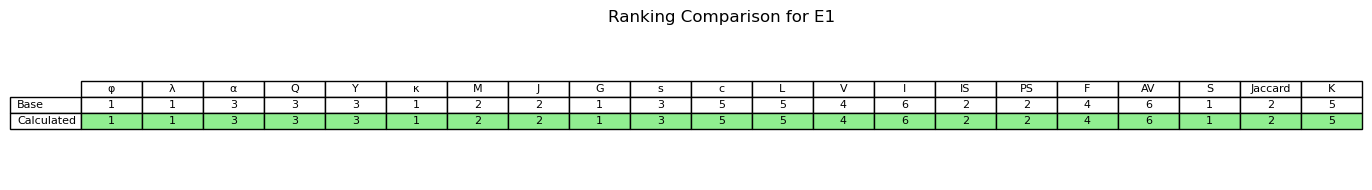

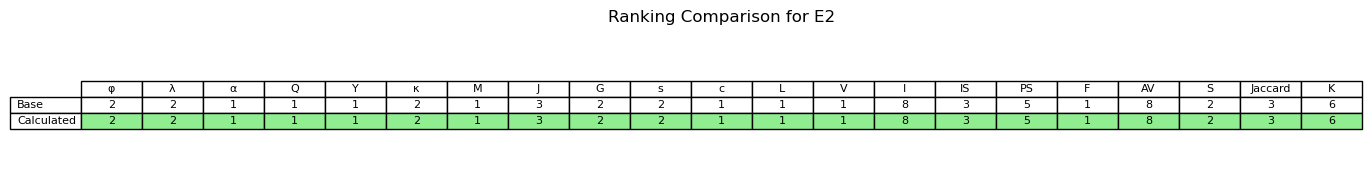

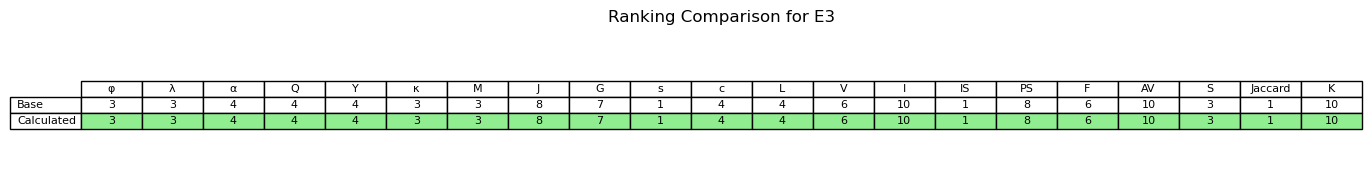

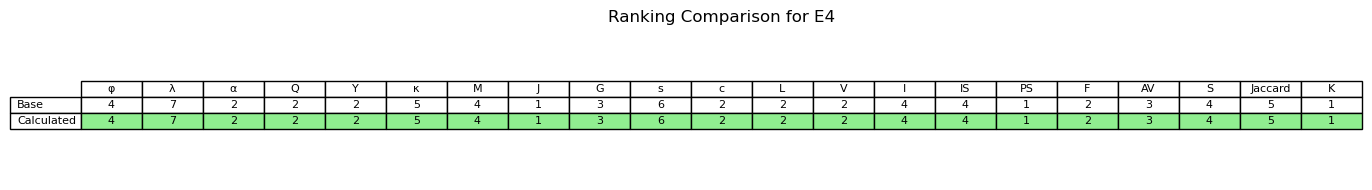

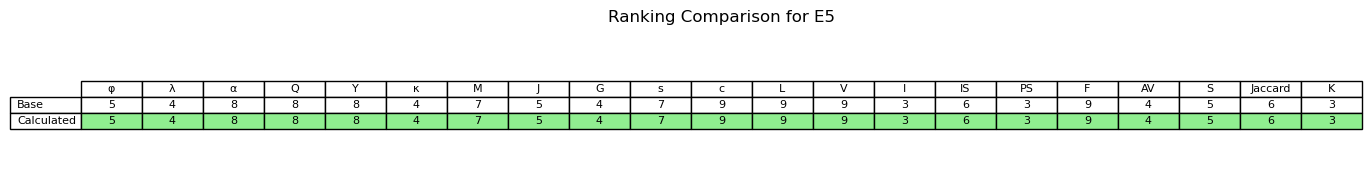

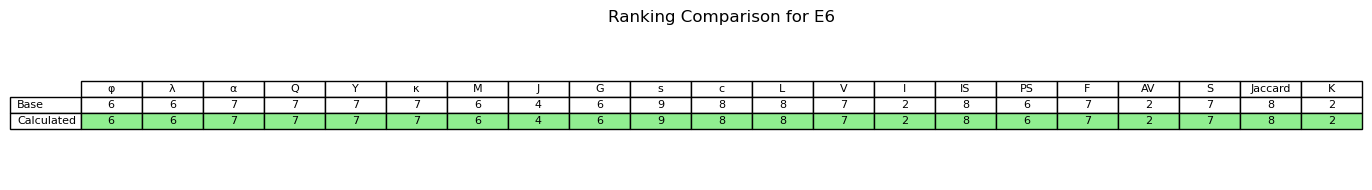

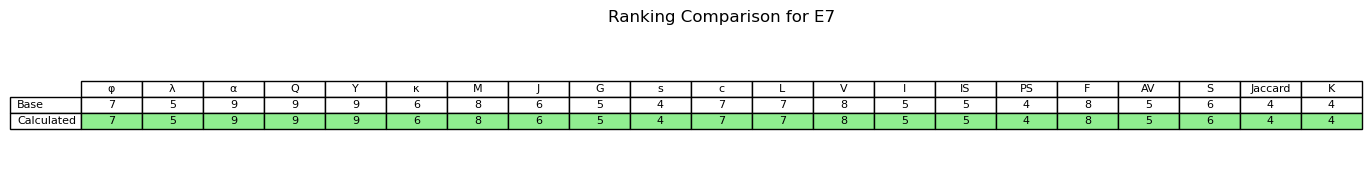

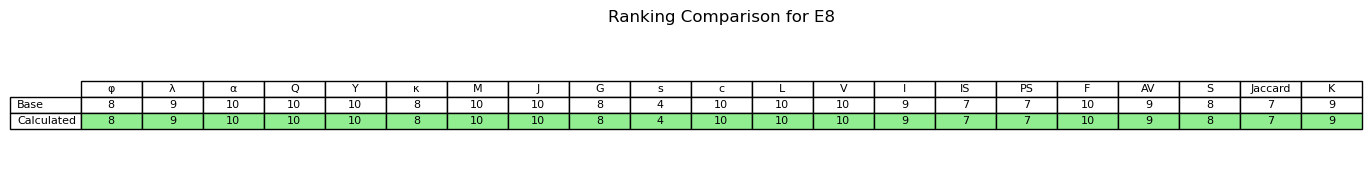

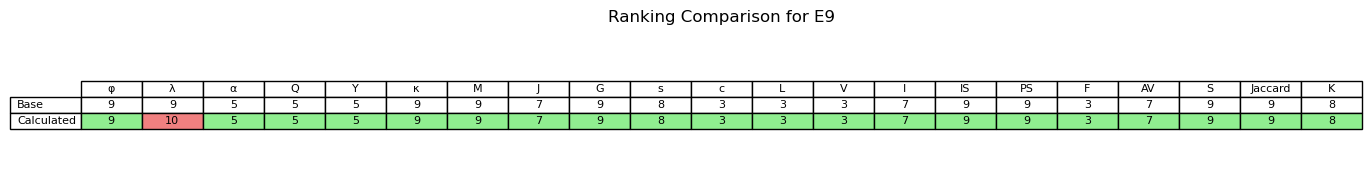

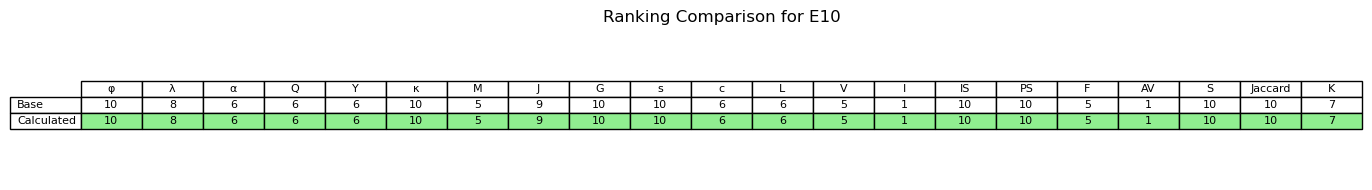

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

# Base ranking dictionary from the image
# base_ranking = {
#     "E1": {"φ": 1, "λ": 1, "α": 3, "Q": 3, "Y": 3, "κ": 1, "M": 2, "J": 2, "G": 1, "s": 3, "c": 5, "L": 5, "V": 4, "I": 6, "IS": 2, "PS": 2, "F": 3, "AV": 1, "S": 2, "Jaccard": 5, "K": 5},
#     "E2": {"φ": 2, "λ": 1, "α": 1, "Q": 1, "Y": 1, "κ": 2, "M": 3, "J": 2, "G": 3, "s": 8, "c": 1, "L": 8, "V": 8, "I": 3, "IS": 1, "PS": 3, "F": 8, "AV": 6, "S": 8, "Jaccard": 3, "K": 6},
#     "E3": {"φ": 3, "λ": 3, "α": 4, "Q": 4, "Y": 4, "κ": 3, "M": 8, "J": 7, "G": 1, "s": 4, "c": 4, "L": 6, "V": 10, "I": 1, "IS": 8, "PS": 1, "F": 1, "AV": 8, "S": 4, "Jaccard": 8, "K": 10},
#     "E4": {"φ": 4, "λ": 7, "α": 2, "Q": 2, "Y": 2, "κ": 5, "M": 4, "J": 1, "G": 2, "s": 2, "c": 2, "L": 2, "V": 6, "I": 2, "IS": 4, "PS": 3, "F": 4, "AV": 3, "S": 3, "Jaccard": 1, "K": 3},
#     "E5": {"φ": 5, "λ": 8, "α": 8, "Q": 8, "Y": 8, "κ": 7, "M": 5, "J": 7, "G": 5, "s": 7, "c": 7, "L": 7, "V": 7, "I": 7, "IS": 5, "PS": 6, "F": 6, "AV": 7, "S": 7, "Jaccard": 7, "K": 1},
#     "E6": {"φ": 6, "λ": 6, "α": 7, "Q": 7, "Y": 7, "κ": 6, "M": 6, "J": 6, "G": 6, "s": 6, "c": 6, "L": 6, "V": 5, "I": 8, "IS": 9, "PS": 7, "F": 9, "AV": 9, "S": 9, "Jaccard": 9, "K": 9},
#     "E7": {"φ": 7, "λ": 5, "α": 9, "Q": 9, "Y": 9, "κ": 9, "M": 9, "J": 9, "G": 9, "s": 9, "c": 9, "L": 9, "V": 9, "I": 5, "IS": 4, "PS": 5, "F": 4, "AV": 4, "S": 5, "Jaccard": 4, "K": 4},
#     "E8": {"φ": 8, "λ": 9, "α": 10, "Q": 10, "Y": 10, "κ": 10, "M": 10, "J": 5, "G": 10, "s": 10, "c": 10, "L": 10, "V": 3, "I": 9, "IS": 10, "PS": 10, "F": 5, "AV": 10, "S": 10, "Jaccard": 10, "K": 7},
#     "E9": {"φ": 9, "λ": 5, "α": 5, "Q": 5, "Y": 5, "κ": 9, "M": 7, "J": 9, "G": 7, "s": 9, "c": 9, "L": 9, "V": 7, "I": 3, "IS": 7, "PS": 9, "F": 7, "AV": 9, "S": 9, "Jaccard": 9, "K": 9},
#     "E10": {"φ": 10, "λ": 8, "α": 6, "Q": 6, "Y": 6, "κ": 10, "M": 5, "J": 9, "G": 10, "s": 10, "c": 10, "L": 6, "V": 5, "I": 1, "IS": 10, "PS": 5, "F": 10, "AV": 5, "S": 10, "Jaccard": 10, "K": 7},
# }


base_ranking = {
        "E1": {"φ": 1, "λ": 1, "α": 3, "Q": 3, "Y": 3, "κ": 1, "M": 2, "J": 2, "G": 1, "s": 3, "c": 5, "L": 5, "V": 4, "I": 6, "IS": 2, "PS": 2, "F": 4, "AV": 6, "S": 1, "Jaccard": 2, "K": 5},
        "E2": {"φ": 2, "λ": 2, "α": 1, "Q": 1, "Y": 1, "κ": 2, "M": 1, "J": 3, "G": 2, "s": 2, "c": 1, "L": 1, "V": 1, "I": 8, "IS": 3, "PS": 5, "F": 1, "AV": 8, "S": 2, "Jaccard": 3, "K": 6},
        "E3": {"φ": 3, "λ": 3, "α": 4, "Q": 4, "Y": 4, "κ": 3, "M": 3, "J": 8, "G": 7, "s": 1, "c": 4, "L": 4, "V": 6, "I": 10, "IS": 1, "PS": 8, "F": 6, "AV": 10, "S": 3, "Jaccard": 1, "K": 10},
        "E4": {"φ": 4, "λ": 7, "α": 2, "Q": 2, "Y": 2, "κ": 5, "M": 4, "J": 1, "G": 3, "s": 6, "c": 2, "L": 2, "V": 2, "I": 4, "IS": 4, "PS": 1, "F": 2, "AV": 3, "S": 4, "Jaccard": 5, "K": 1},
        "E5": {"φ": 5, "λ": 4, "α": 8, "Q": 8, "Y": 8, "κ": 4, "M": 7, "J": 5, "G": 4, "s": 7, "c": 9, "L": 9, "V": 9, "I": 3, "IS": 6, "PS": 3, "F": 9, "AV": 4, "S": 5, "Jaccard": 6, "K": 3},
        "E6": {"φ": 6, "λ": 6, "α": 7, "Q": 7, "Y": 7, "κ": 7, "M": 6, "J": 4, "G": 6, "s": 9, "c": 8, "L": 8, "V": 7, "I": 2, "IS": 8, "PS": 6, "F": 7, "AV": 2, "S": 7, "Jaccard": 8, "K": 2},
        "E7": {"φ": 7, "λ": 5, "α": 9, "Q": 9, "Y": 9, "κ": 6, "M": 8, "J": 6, "G": 5, "s": 4, "c": 7, "L": 7, "V": 8, "I": 5, "IS": 5, "PS": 4, "F": 8, "AV": 5, "S": 6, "Jaccard": 4, "K": 4},
        "E8": {"φ": 8, "λ": 9, "α": 10, "Q": 10, "Y": 10, "κ": 8, "M": 10, "J": 10, "G": 8, "s": 4, "c": 10, "L": 10, "V": 10, "I": 9, "IS": 7, "PS": 7, "F": 10, "AV": 9, "S": 8, "Jaccard": 7, "K": 9},
        "E9": {"φ": 9, "λ": 9, "α": 5, "Q": 5, "Y": 5, "κ": 9, "M": 9, "J": 7, "G": 9, "s": 8, "c": 3, "L": 3, "V": 3, "I": 7, "IS": 9, "PS": 9, "F": 3, "AV": 7, "S": 9, "Jaccard": 9, "K": 8},
        "E10": {"φ": 10, "λ": 8, "α": 6, "Q": 6, "Y": 6, "κ": 10, "M": 5, "J": 9, "G": 10, "s": 10, "c": 6, "L": 6, "V": 5, "I": 1, "IS": 10, "PS": 10, "F": 5, "AV": 1, "S": 10, "Jaccard": 10, "K": 7},
}

# Assume calculated_ranking is obtained from previous computation
# Replace with actual computed values
# calculated_ranking = ranked_results
calculated_ranking =ranked_nested_dict
# Compare and log differences
# differences = {}
# for key in base_ranking:
#     base_values = base_ranking[key]
#     # calculated_values = calculated_ranking.get(key, {})
#     calculated_values = calculated_ranking[key]
    
#     diffs = {metric: (base_values[metric], calculated_values[metric]) 
#              for metric in base_values if base_values[metric] != calculated_values[metric]}
    
#     if diffs:
#         differences[key] = diffs

plot_comparison(base_ranking, calculated_ranking)

In [288]:
report = """
All 21 objective measures can be calculated directly from the 2×2 contingency table. 
I have compared the results obtained from the base rankings and the rankings computed from my implementation.

The rankings match for all measures except for E9 (Goodman-Kruskal's λ). 
The discrepancy appears to be due to rounding issues. In the original paper, it seems that extremely small values 
were approximated or treated as 0.0, whereas in actual computation, those values are non-zero but very close to zero.

This minor difference affects the rank of λ, but the implementation remains consistent with the formula definitions.
"""

print(report)


All 21 objective measures can be calculated directly from the 2×2 contingency table. 
I have compared the results obtained from the base rankings and the rankings computed from my implementation.

The rankings match for all measures except for E9 (Goodman-Kruskal's λ). 
The discrepancy appears to be due to rounding issues. In the original paper, it seems that extremely small values 
were approximated or treated as 0.0, whereas in actual computation, those values are non-zero but very close to zero.

This minor difference affects the rank of λ, but the implementation remains consistent with the formula definitions.

